## TensorFlow Regression
https://www.tensorflow.org/tutorials/keras/basic_regression

https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-perceptron-algorithm-b0275375fea1

In [1]:
from __future__ import absolute_import, division, print_function

import numpy as np
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


### Prepare data

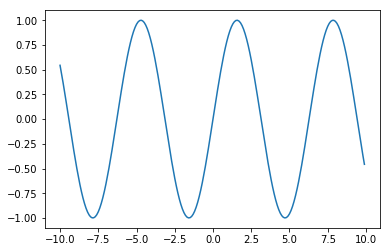

In [2]:
def hidden_function(x):
    return np.sin(x)

def hidden_function_bbox():
    points = np.arange(-10, 10, 0.1)
    return points

x = hidden_function_bbox()
y = hidden_function(x)

dataset = pd.DataFrame({'X': x, 'Y': y})

plt.plot(x, y)
plt.show()

In [3]:
dataset.describe()

,X,Y
count,200.000000,200.000000
mean,-0.050000,0.002720
std,5.787918,0.692563
min,-10.000000,-0.999923
25%,-5.025000,-0.666093
50%,-0.050000,0.008407
75%,4.925000,0.666093
max,9.900000,0.999923


In [4]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

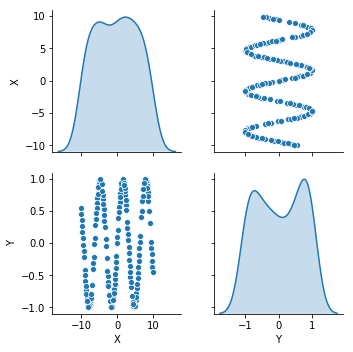

In [5]:
sns.pairplot(train_dataset[["X", "Y"]], diag_kind="kde")

In [6]:
train_stats = train_dataset.describe()
train_stats.pop("Y")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
X,160.0,-0.19875,5.826107,-10.0,-5.125,-0.1,4.675,9.9


In [7]:
train_labels = train_dataset.pop('Y')
test_labels = test_dataset.pop('Y')

In [8]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [9]:
def build_model():
    model = keras.Sequential([
    layers.Dense(32, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [10]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.

.

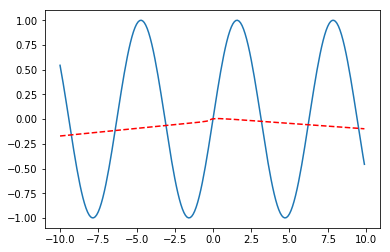

..................................................

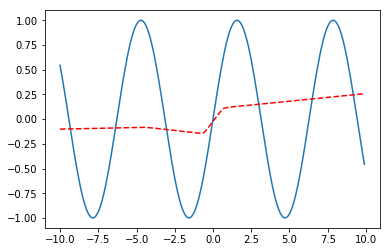

.................................................
.

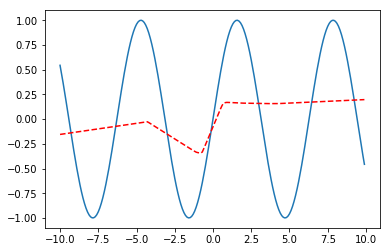

..................................................

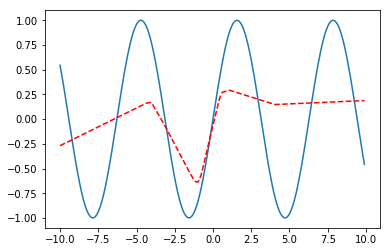

.................................................
.

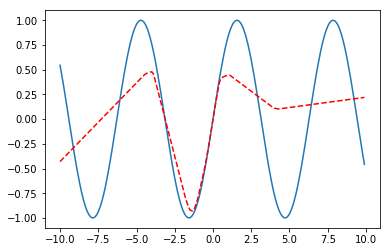

..................................................

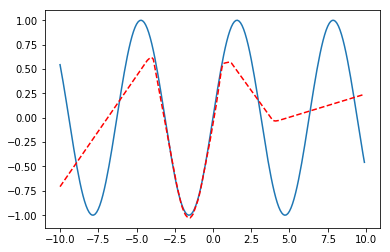

.................................................
.

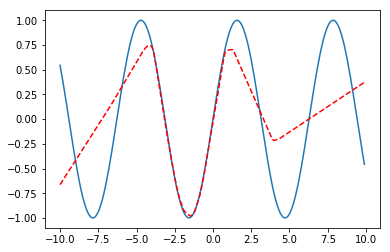

..................................................

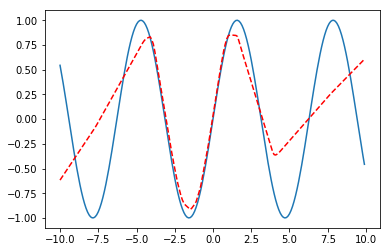

.................................................
.

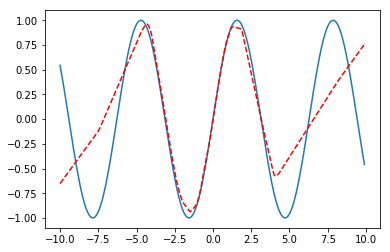

..................................................

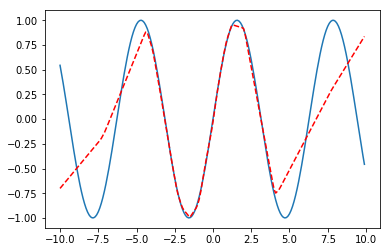

.................................................
.

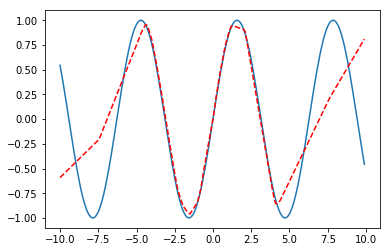

..................................................

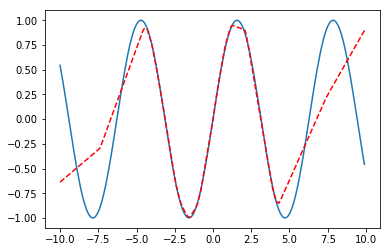

.................................................
.

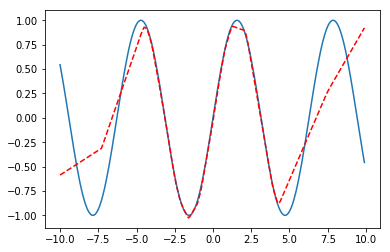

..................................................

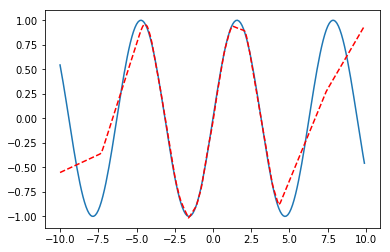

.................................................
.

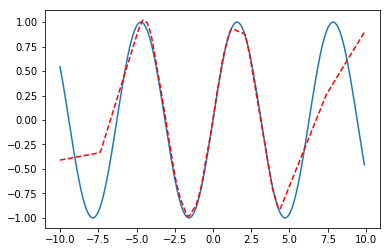

..................................................

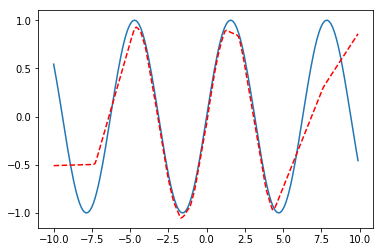

.................................................
.

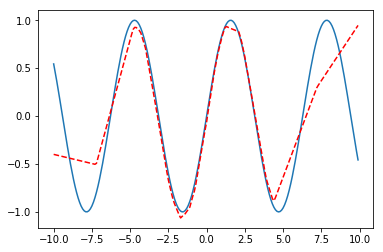

..................................................

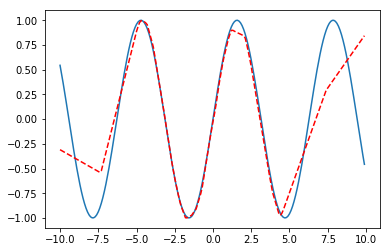

.................................................
.

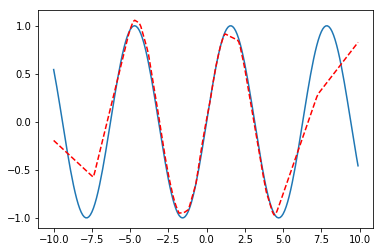

..................................................

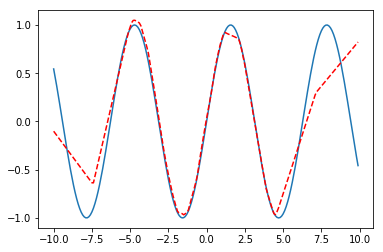

.................................................
.

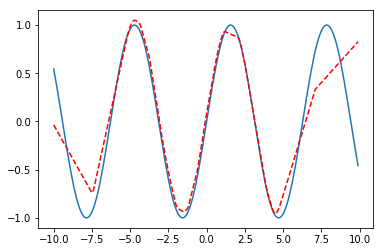

..................................................

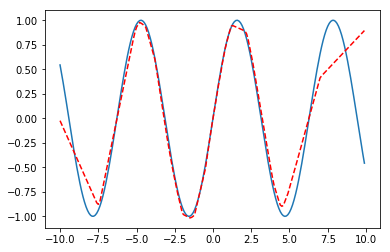

.................................................
.

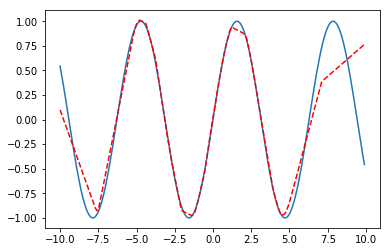

..................................................

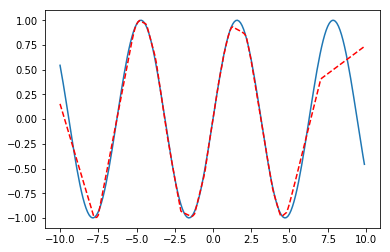

.................................................
.

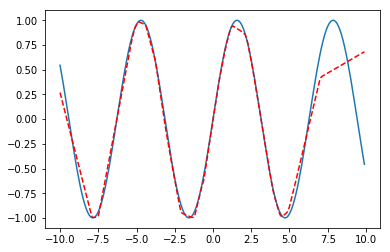

..................................................

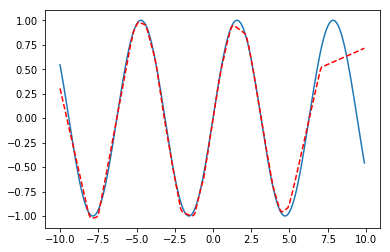

.................................................
.

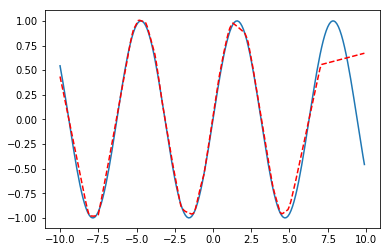

..................................................

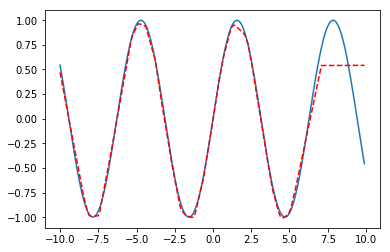

.................................................
.

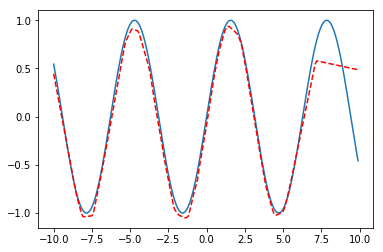

..................................................

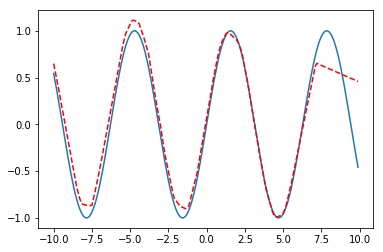

.................................................
.

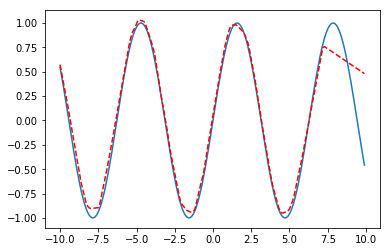

..................................................

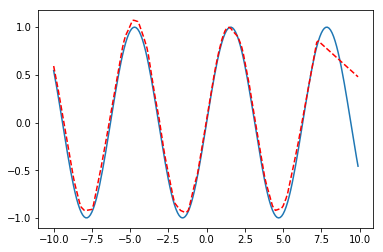

.................................................
.

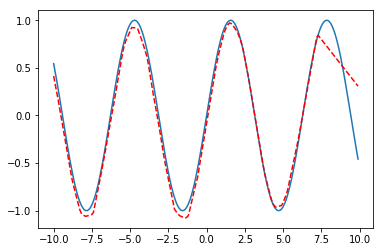

..................................................

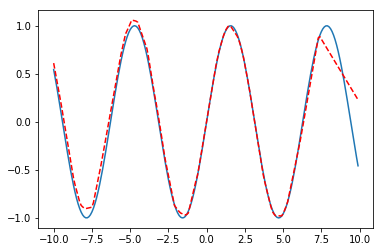

.................................................
.

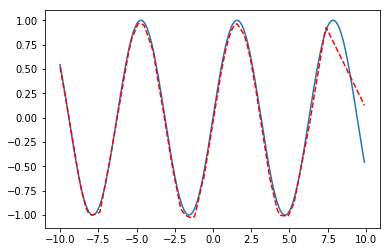

..................................................

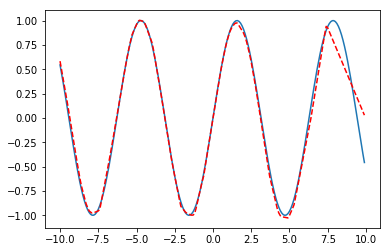

.................................................
.

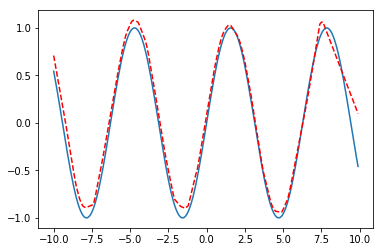

..................................................

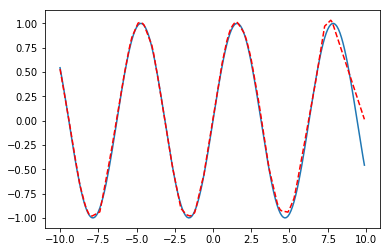

.................................................
.

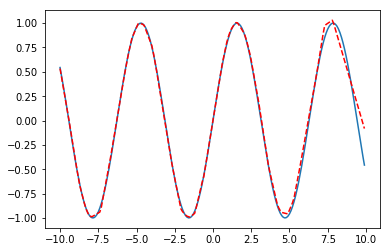

..................................................

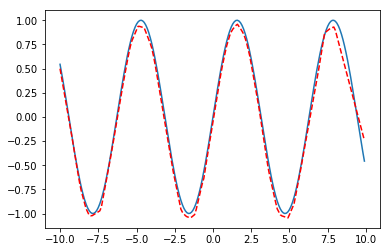

.................................................
.

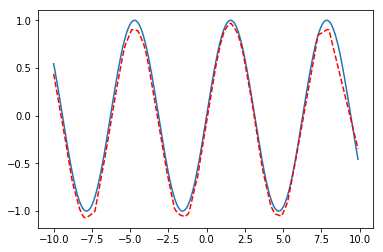

..................................................

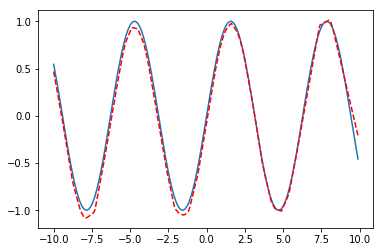

.................................................
.

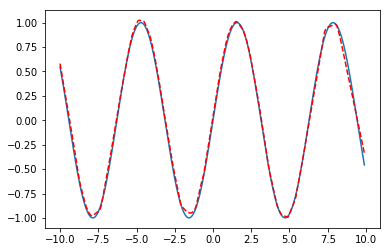

..................................................

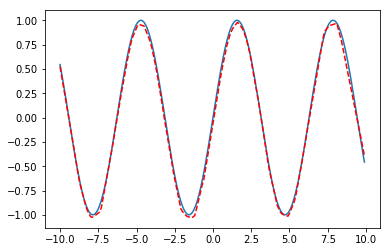

.................................................
.

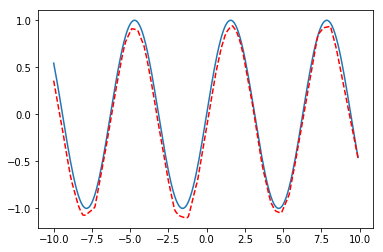

..................................................

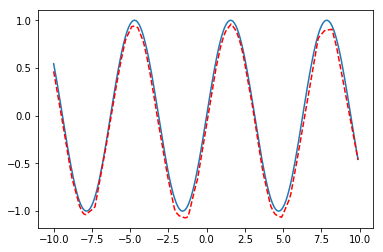

.................................................
.

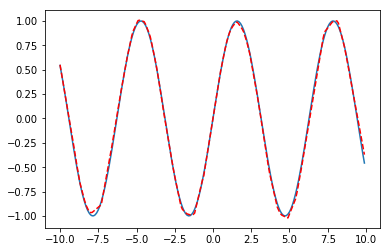

..................................................

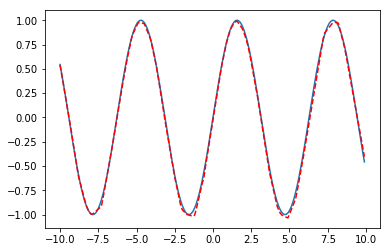

.................................................
.

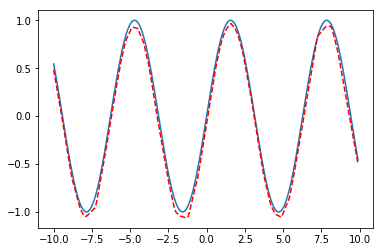

..................................................

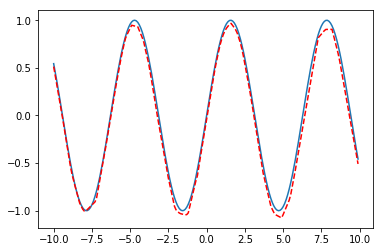

.................................................
.

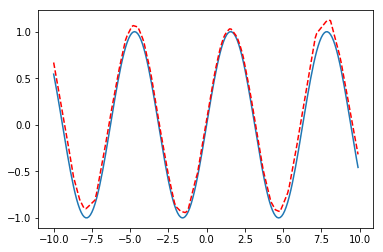

..................................................

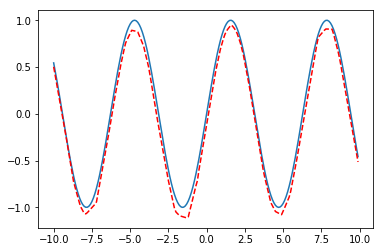

.................................................
.

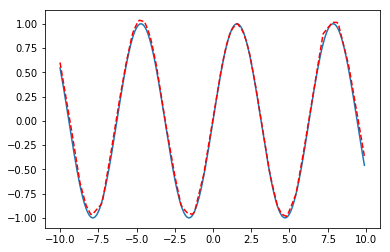

..................................................

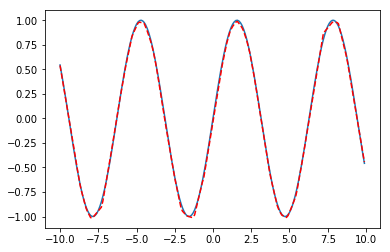

.................................................
.

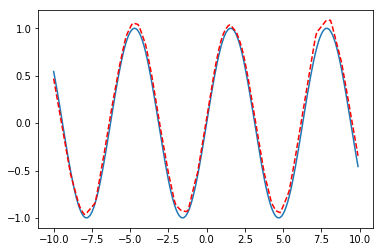

..................................................

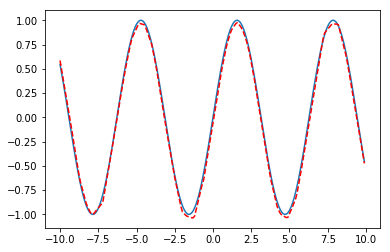

.................................................
.

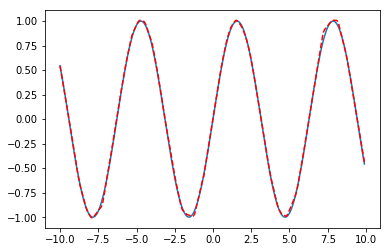

..................................................

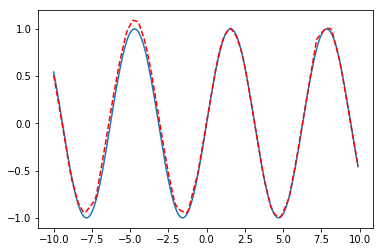

.................................................
.

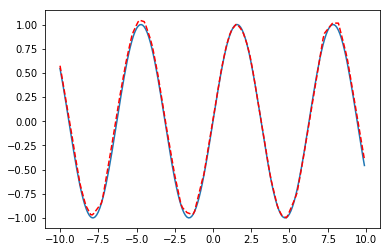

..................................................

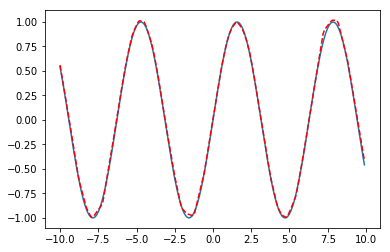

.................................................

In [12]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
        if epoch % 50 == 0:
            points = hidden_function_bbox()
            normed_play_dataset = (points - float(train_stats['mean'])) / float(train_stats['std'])
            plt.plot(points, hidden_function(points))
            plt.plot(points, model.predict(normed_play_dataset).flatten(), 'r--')
            plt.show()

EPOCHS = 3000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
2995,0.000654,0.020022,0.000654,0.004803,0.066510,0.004803,2995
2996,0.005563,0.067973,0.005563,0.004243,0.058882,0.004243,2996
2997,0.002366,0.042017,0.002366,0.001175,0.029726,0.001175,2997
2998,0.000620,0.020228,0.000620,0.000363,0.014741,0.000363,2998
2999,0.000214,0.012142,0.000214,0.000716,0.022793,0.000716,2999


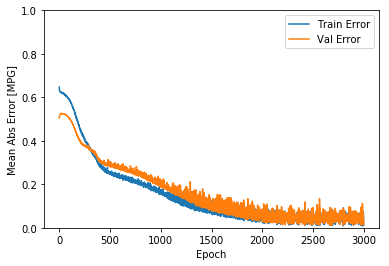

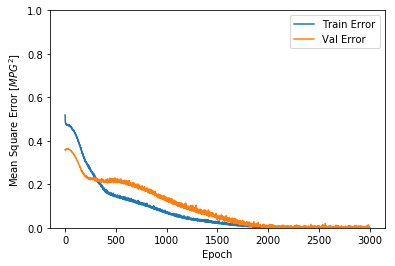

In [14]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)

In [15]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

Testing set Mean Abs Error:  0.03


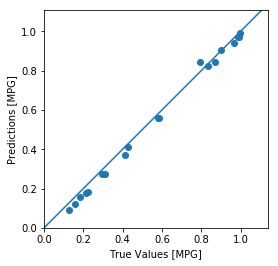

In [16]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

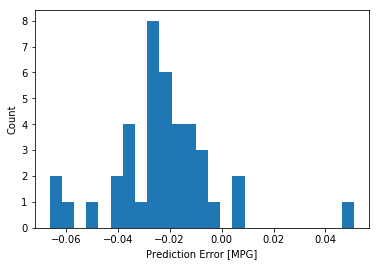

In [17]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

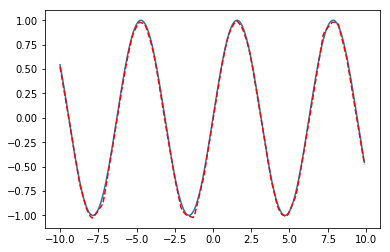

In [18]:
def plot_functions(model):
    points = hidden_function_bbox()

    # play_dataset = dataset.copy()
    # play_dataset.pop('Y')
    # normed_play_dataset = norm(play_dataset)

    # points = np.arange(-50, 50, 0.1)
    normed_play_dataset = (points - float(train_stats['mean'])) / float(train_stats['std'])

    # points= np.arange(-20, 20, 0.1)
    # np.exp(-t) * np.cos(2*np.pi*t)
    plt.plot(points, hidden_function(points))
    plt.plot(points, model.predict(normed_play_dataset).flatten(), 'r--')
    plt.show()
    
plot_functions(model)

### Break model

In [19]:
weights_final = np.copy(model.get_weights())
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

Testing set Mean Abs Error:  0.03


Testing set Mean Abs Error:  0.14


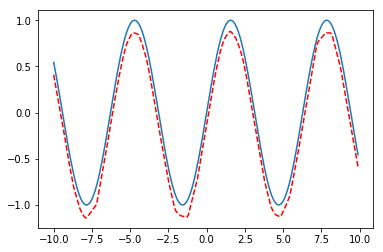

In [20]:
weights_1 = np.copy(weights_final)
weights_1[5]=np.array([0])
model.set_weights(weights_1)
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))
plot_functions(model)

In [21]:
def break_model(model, weights, rule, display_graph=False, update_all_model=False):
    result = []
    stats = []

    for w_i, W in enumerate(weights):
        w_shape = np.array(W).shape
        w_flatten = np.array(W).flatten()
        for i in range(0, len(w_flatten)-1):
            # store old value
            old_value = w_flatten[i]
            # break a model
            w_flatten[i] = rule(w_flatten[i])
            # test
            weights[w_i] = w_flatten.reshape(w_shape)
            model.set_weights(weights)
            loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
            result.append(mae)
            stats.append([w_i, i, mae])

            if mae > 1 and display_graph:
                print("Testing set Mean Abs Error: {:5.2f}".format(mae))
                print(w_i, i)
                plot_functions(model)

            # rollback
            if not update_all_model:
                w_flatten[i] = old_value
                weights[w_i] = w_flatten.reshape(w_shape)  
            
            
    return result, stats, weights

In [24]:
breaks = [lambda a : 0*a, lambda a : -1*a, lambda a : round(a, 1)]

for rule in breaks:
    result, stats, weights_updated = break_model(model, np.copy(weights_final), rule, False, False)
    
    #plt.plot(result)
    #plt.show()
    print('----')
    for i, v in enumerate(stats):
        if v[2] > 1:
            print(v)

----
[0, 22, 1.0473478]
[1, 22, 1.1239363]
----
[0, 2, 1.3094609]
[0, 8, 1.3804066]
[0, 9, 1.1277432]
[0, 10, 1.1382068]
[0, 16, 1.3418056]
[0, 18, 1.7838929]
[0, 20, 1.4084179]
[0, 22, 1.6973464]
[0, 24, 1.5517782]
[1, 12, 1.7538984]
[1, 22, 1.3353713]
[1, 26, 2.0502467]
[1, 27, 1.2486452]
[1, 28, 1.2650595]
[2, 732, 1.232539]
[4, 10, 1.7853928]
[4, 15, 1.107949]
[4, 18, 1.0748163]
[4, 20, 1.2740247]
[4, 27, 1.6033596]
----


Testing set Mean Abs Error:  0.31


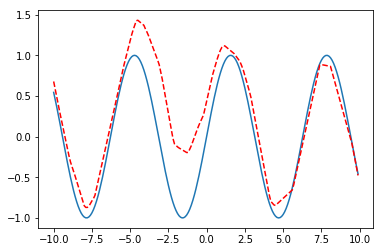

-4.6308784


In [23]:
# round
rule = lambda a : round(a, 1)
result, stats, weights_updated = break_model(model, np.copy(weights_final), rule, False, True)

model.set_weights(weights_updated)
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))
plot_functions(model)

print(np.sum(np.sum(weights_updated - weights_final)))